In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff


In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0           127   525747  1.726062e+09  0.123641  0.045951  0.323994   
 1           127   525748  1.726062e+09  0.123443  0.045991  0.323931   
 2           127   525749  1.726062e+09  0.123272  0.045994  0.323934   
 3           127   525750  1.726062e+09  0.123173  0.045981  0.324000   
 4           127   525751  1.726062e+09  0.123121  0.045986  0.324058   
 ...         ...      ...           ...       ...       ...       ...   
 7293875   38925  8327680  1.726140e+09 -0.075826 -0.138745  0.321760   
 7293876   38925  8327681  1.726140e+09 -0.076105 -0.138408  0.323635   
 7293877   38925  8327682  1.726140e+09 -0.076344 -0.138119  0.325686   
 7293878   38925  8327683  1.726140e+09 -0.076725 -0.137698  0.327572   
 7293879   38925  8327684  1.726140e+09 -0.079485 -0.134849  0.323094   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.014229  0.001461 -0.003014  1.708381e-07

In [4]:
timestamps = []
for idx, row in csvs["opto"].iterrows():
    obj_id = int(row.obj_id)
    frame = int(row.frame)

    timestamps.append(df[(df.obj_id == obj_id) & (df.frame == frame)].timestamp.values)

In [5]:
df = pd.DataFrame(timestamps, columns=['timestamp'])
df.to_csv(r'C:\Users\pandey\Documents\timestamps.csv', index=False)


In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])

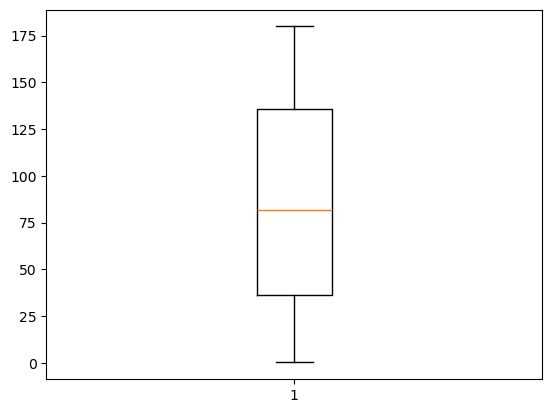

In [14]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()

In [ ]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{257,
 522,
 553,
 569,
 597,
 640,
 929,
 1535,
 1579,
 2245,
 2656,
 2751,
 3133,
 3197,
 3203,
 3403,
 4153,
 4946,
 5593,
 6743,
 6967,
 7505,
 7539,
 8445,
 9857,
 10148,
 10319,
 10820,
 11131,
 11590,
 12659,
 13070,
 15046,
 15054,
 15274,
 16058,
 16555,
 16581,
 16818,
 16954,
 17444,
 17609,
 17764,
 17776,
 18335,
 18459,
 18898,
 19496,
 19896,
 20106,
 20324,
 20444,
 20640,
 20754,
 20773,
 21002,
 21007,
 21366,
 21608,
 22032,
 22976,
 23587,
 23590,
 23591,
 23593,
 23594,
 23606,
 23821,
 23871,
 23891,
 24051,
 24208,
 24237,
 24306,
 24328,
 24375,
 24377,
 24402,
 24408,
 24409,
 24416,
 24438,
 24545,
 24810,
 24856,
 24919,
 25538,
 25679,
 26128,
 26401,
 26677,
 26960,
 27121,
 28886,
 28970,
 29231,
 29232,
 29662,
 29783,
 30117,
 31485,
 32358,
 32368,
 32406,
 32437,
 33406,
 33475,
 33758,
 34141,
 34628,
 34656,
 34999,
 35591,
 35735,
 35736,
 35738,
 35870,
 36666,
 36812,
 36823,
 36845,
 37078,
 37091,
 37586,
 37617,
 37801,
 38043,
 38061,
 38361,


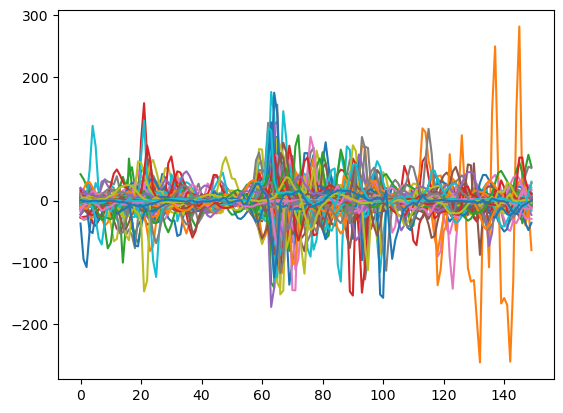

In [ ]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

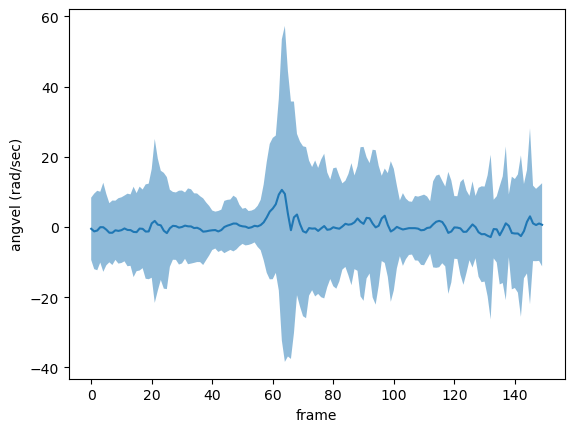

In [ ]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

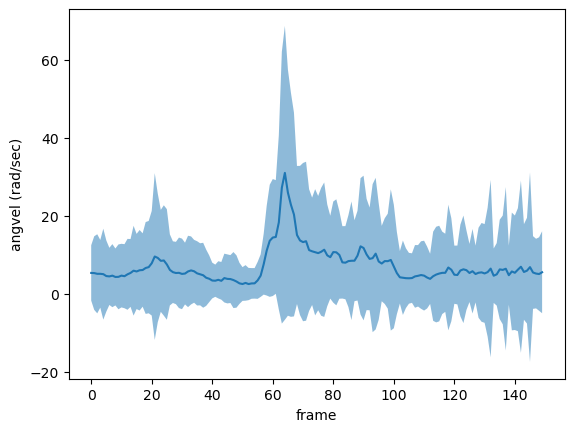

In [ ]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

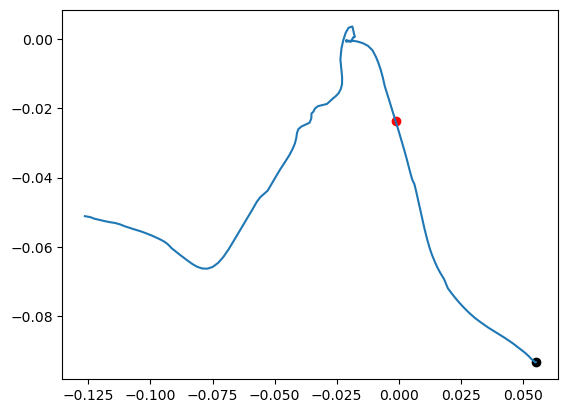

In [ ]:
i = 0
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [ ]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

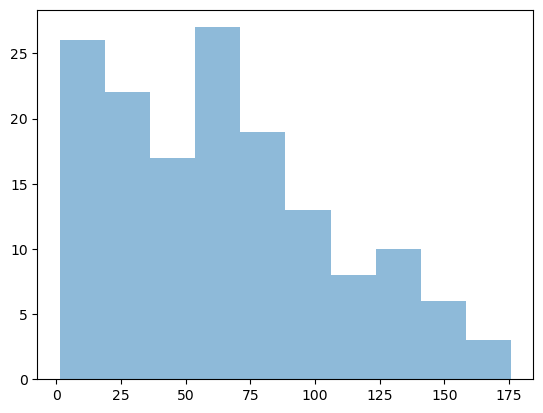

In [ ]:
plt.figure()
plt.hist(data1_max, alpha=0.5)
plt.show()

In [ ]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

63.651079176324544
Standard Deviation of data1_max: 43.3526
Standard Error of data1_max: 3.5280


In [ ]:
print(f"Shape of data1_max: {data1_max.shape}")

Shape of data1_max: (151,)


In [ ]:
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of flattened data: (151,)
D'Agostino's K-squared Test Statistic: 8.3897837974679
P-value: 0.015072371716490219


In [5]:
import numpy as np
position_array = np.array(data['position'])
print("Numpy array shape:", position_array.shape)


Numpy array shape: (151, 150, 3)


In [7]:
import numpy as np

# Convert data['position'] to a NumPy array if it's still a list
position_array = np.array(data['position'])

# Now you can slice the data
pre_stimulus = position_array[:, 0:50, :]  # Frames 0 to 49
stimulus = position_array[:, 50:80, :]    # Frames 50 to 79
post_stimulus = position_array[:, 80:150, :]  # Frames 80 to 149

# Print shapes for verification
print("Pre-stimulus shape:", pre_stimulus.shape)
print("Stimulus shape:", stimulus.shape)
print("Post-stimulus shape:", post_stimulus.shape)

Pre-stimulus shape: (151, 50, 3)
Stimulus shape: (151, 30, 3)
Post-stimulus shape: (151, 70, 3)


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Extract ranges for all recordings
pre_stimulus = position_array[:, 0:50, :]
stimulus = position_array[:, 50:80, :]
post_stimulus = position_array[:, 80:150, :]

# Flatten the data for easy plotting
pre_stimulus_flat = pre_stimulus.reshape(-1, 3)  # (146*50, 3)
stimulus_flat = stimulus.reshape(-1, 3)          # (146*30, 3)
post_stimulus_flat = post_stimulus.reshape(-1, 3)  # (146*70, 3)

# Extract X, Y, Z values
x_pre, y_pre, z_pre = pre_stimulus_flat[:, 0], pre_stimulus_flat[:, 1], pre_stimulus_flat[:, 2]
x_stim, y_stim, z_stim = stimulus_flat[:, 0], stimulus_flat[:, 1], stimulus_flat[:, 2]
x_post, y_post, z_post = post_stimulus_flat[:, 0], post_stimulus_flat[:, 1], post_stimulus_flat[:, 2]


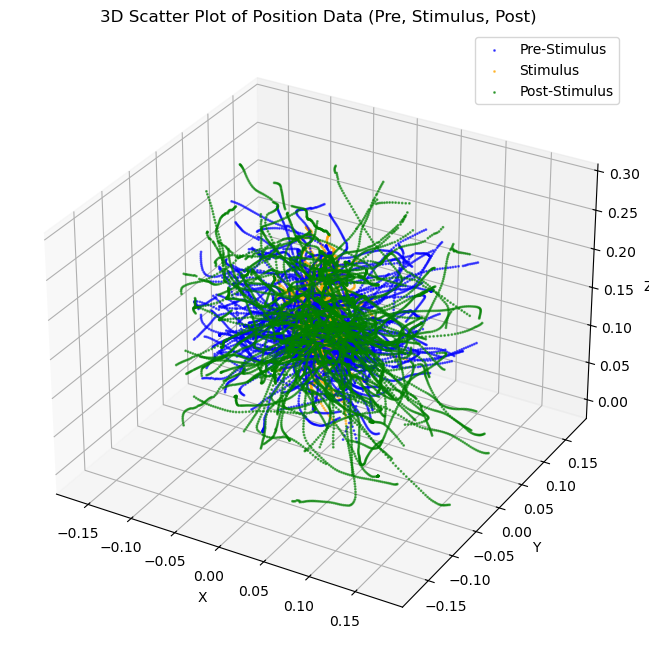

In [10]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each range with different colors
ax.scatter(x_pre, y_pre, z_pre, c='blue', label='Pre-Stimulus', alpha=0.6, s=1)
ax.scatter(x_stim, y_stim, z_stim, c='orange', label='Stimulus', alpha=0.6, s=1)
ax.scatter(x_post, y_post, z_post, c='green', label='Post-Stimulus', alpha=0.6, s=1)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Position Data (Pre, Stimulus, Post)')

# Add legend
ax.legend()

# Show the plot
plt.show()


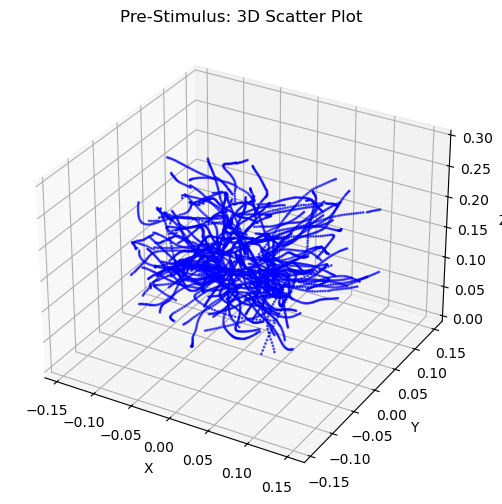

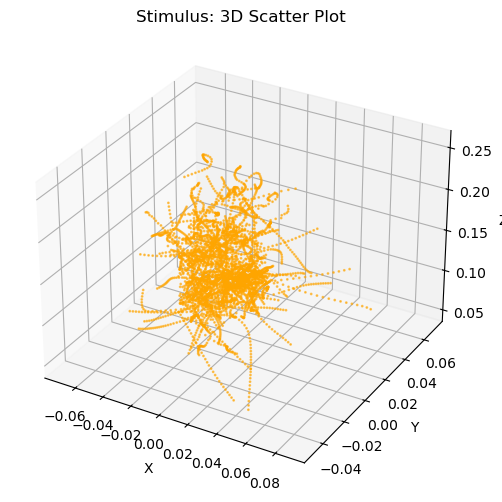

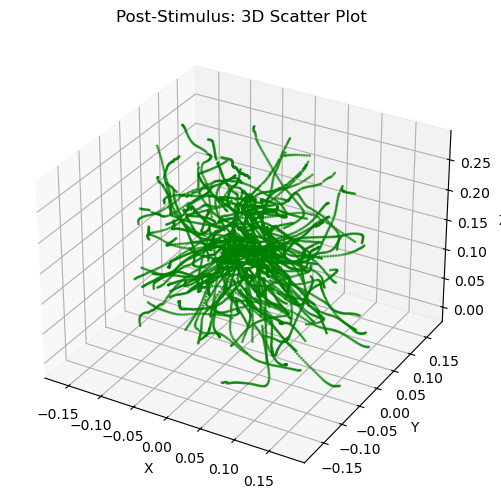

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a separate 3D scatter plot for each range

# Pre-stimulus Plot
fig_pre = plt.figure(figsize=(8, 6))
ax_pre = fig_pre.add_subplot(111, projection='3d')
ax_pre.scatter(x_pre, y_pre, z_pre, c='blue', alpha=0.6, s=1)
ax_pre.set_xlabel('X')
ax_pre.set_ylabel('Y')
ax_pre.set_zlabel('Z')
ax_pre.set_title('Pre-Stimulus: 3D Scatter Plot')
plt.show()

# Stimulus Plot
fig_stim = plt.figure(figsize=(8, 6))
ax_stim = fig_stim.add_subplot(111, projection='3d')
ax_stim.scatter(x_stim, y_stim, z_stim, c='orange', alpha=0.6, s=1)
ax_stim.set_xlabel('X')
ax_stim.set_ylabel('Y')
ax_stim.set_zlabel('Z')
ax_stim.set_title('Stimulus: 3D Scatter Plot')
plt.show()

# Post-stimulus Plot
fig_post = plt.figure(figsize=(8, 6))
ax_post = fig_post.add_subplot(111, projection='3d')
ax_post.scatter(x_post, y_post, z_post, c='green', alpha=0.6, s=1)
ax_post.set_xlabel('X')
ax_post.set_ylabel('Y')
ax_post.set_zlabel('Z')
ax_post.set_title('Post-Stimulus: 3D Scatter Plot')
plt.show()

In [12]:
# Centroid (Mean Position) for each range
centroid_pre = np.mean(pre_stimulus_flat, axis=0)  # Mean of x, y, z
centroid_stim = np.mean(stimulus_flat, axis=0)
centroid_post = np.mean(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Centroid (X, Y, Z): {centroid_pre}")
print(f"Stimulus Centroid (X, Y, Z): {centroid_stim}")
print(f"Post-Stimulus Centroid (X, Y, Z): {centroid_post}")


Pre-Stimulus Centroid (X, Y, Z): [ 0.00274319 -0.00778369  0.14993014]
Stimulus Centroid (X, Y, Z): [-0.00144845  0.00274143  0.14232807]
Post-Stimulus Centroid (X, Y, Z): [0.0042069  0.0027688  0.13540543]


In [13]:
# Standard deviation for each range
std_pre = np.std(pre_stimulus_flat, axis=0)
std_stim = np.std(stimulus_flat, axis=0)
std_post = np.std(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Standard Deviation (X, Y, Z): {std_pre}")
print(f"Stimulus Standard Deviation (X, Y, Z): {std_stim}")
print(f"Post-Stimulus Standard Deviation (X, Y, Z): {std_post}")


Pre-Stimulus Standard Deviation (X, Y, Z): [0.05258243 0.04937936 0.0432341 ]
Stimulus Standard Deviation (X, Y, Z): [0.01786325 0.01649525 0.03632524]
Post-Stimulus Standard Deviation (X, Y, Z): [0.058984   0.05441045 0.05565304]


In [14]:
# Maximum distance from centroid
def max_distance_from_centroid(data, centroid):
    distances = np.linalg.norm(data - centroid, axis=1)  # Euclidean distance
    return np.max(distances)

max_dist_pre = max_distance_from_centroid(pre_stimulus_flat, centroid_pre)
max_dist_stim = max_distance_from_centroid(stimulus_flat, centroid_stim)
max_dist_post = max_distance_from_centroid(post_stimulus_flat, centroid_post)

print(f"Pre-Stimulus Maximum Distance from Centroid: {max_dist_pre}")
print(f"Stimulus Maximum Distance from Centroid: {max_dist_stim}")
print(f"Post-Stimulus Maximum Distance from Centroid: {max_dist_post}")


Pre-Stimulus Maximum Distance from Centroid: 0.18672818540049047
Stimulus Maximum Distance from Centroid: 0.1155777476913769
Post-Stimulus Maximum Distance from Centroid: 0.2236972601446065


In [15]:
# Path length for each range
def path_length(data):
    distances = np.linalg.norm(np.diff(data, axis=0), axis=1)  # Summing the distances between consecutive points
    return np.sum(distances)

path_pre = path_length(pre_stimulus_flat)
path_stim = path_length(stimulus_flat)
path_post = path_length(post_stimulus_flat)

print(f"Pre-Stimulus Path Length: {path_pre}")
print(f"Stimulus Path Length: {path_stim}")
print(f"Post-Stimulus Path Length: {path_post}")

Pre-Stimulus Path Length: 35.606634206136974
Stimulus Path Length: 17.77452586807385
Post-Stimulus Path Length: 42.69187087339736


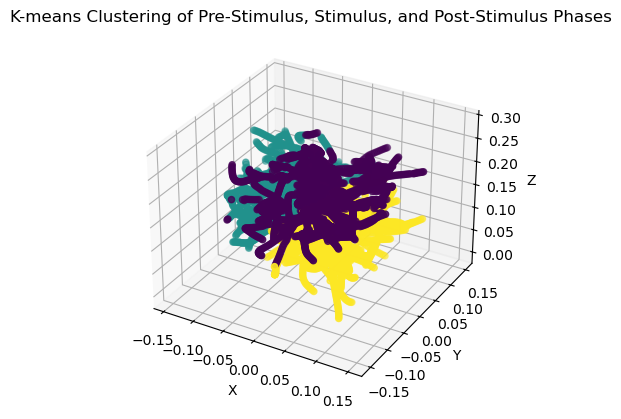

In [17]:
import numpy as np

# Truncate data to the same number of frames (let's choose 30 frames)
num_frames = 30  # Choose the smallest number of frames

# Truncate each phase to 30 frames (you can adjust this value as needed)
pre_stimulus_truncated = pre_stimulus[:, :num_frames, :]
stimulus_truncated = stimulus[:, :num_frames, :]
post_stimulus_truncated = post_stimulus[:, :num_frames, :]

# Combine the truncated data
combined_data = np.concatenate([pre_stimulus_truncated, stimulus_truncated, post_stimulus_truncated], axis=0)

# Reshape data (for clustering, we use all x, y, z coordinates)
X = combined_data.reshape(-1, 3)  # Flatten the data for clustering (each row is a data point)

# Perform K-means clustering (assume 3 clusters, one for each phase)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Visualizing the clustering result in 3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('K-means Clustering of Pre-Stimulus, Stimulus, and Post-Stimulus Phases')
plt.show()
